# Know your customers

One of the most common applications of KMeans is to do customer segmentation. Take a very simple dataset to try to create clusters of customers.

0. Import usuals librairies

In [61]:
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

1. Import the ```Mall_Customers.csv``` dataset

In [62]:
df = pd.read_csv("../../src/Mall_Customers.csv", index_col=[0])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


3. Dummy your categorical variables 

In [63]:
from sklearn.preprocessing import StandardScaler
numericals = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
scale = StandardScaler()
df[numericals] = scale.fit_transform(df[numericals])

df = pd.get_dummies(df, drop_first=True)
df.describe(include="all")

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16,0.440000
std,1.002509e+00,1.002509e+00,1.002509e+00,0.497633
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,0.000000
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,0.000000
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,0.000000
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.000000
max,2.235532e+00,2.917671e+00,1.894492e+00,1.000000


4. We are going to build our clusters, but to do so, we need to know the optimum number of clusters we need. First use the ```Elbow``` method to see if we can see how many we need to take as a value for ```k```.

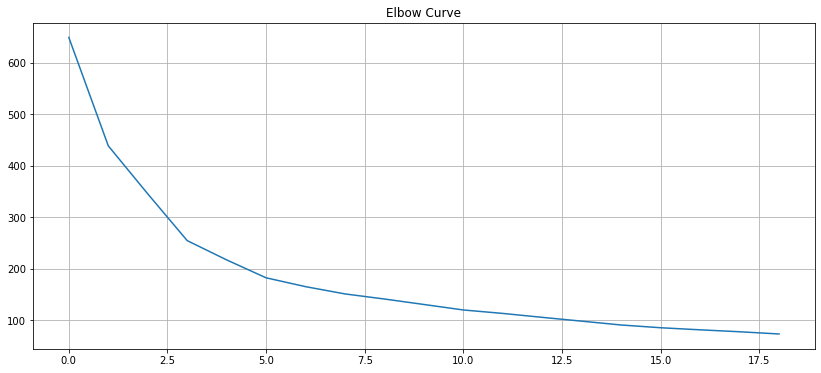

In [64]:
from sklearn.cluster import KMeans

wcss = [KMeans(n_clusters= i, init = "k-means++", random_state = 0).fit(df).inertia_ for i in range(1,20)]

# Create DataFrame
wcss_frame = pd.Series(wcss)
fig, ax = plt.subplots(1,1,figsize=(14,6))
sns.lineplot(data=wcss_frame)
plt.grid(True)
plt.title("Elbow Curve")
plt.show()

5. Then use the _Silhouette_ method to see if we can refine our hypothesis for ```k```.

For n_clusters = 2 The average silhouette_score is : 0.3031976564160757
For n_clusters = 3 The average silhouette_score is : 0.3142800845203407
For n_clusters = 4 The average silhouette_score is : 0.3502702043465398
For n_clusters = 5 The average silhouette_score is : 0.34977050035201074
For n_clusters = 6 The average silhouette_score is : 0.356485834425401


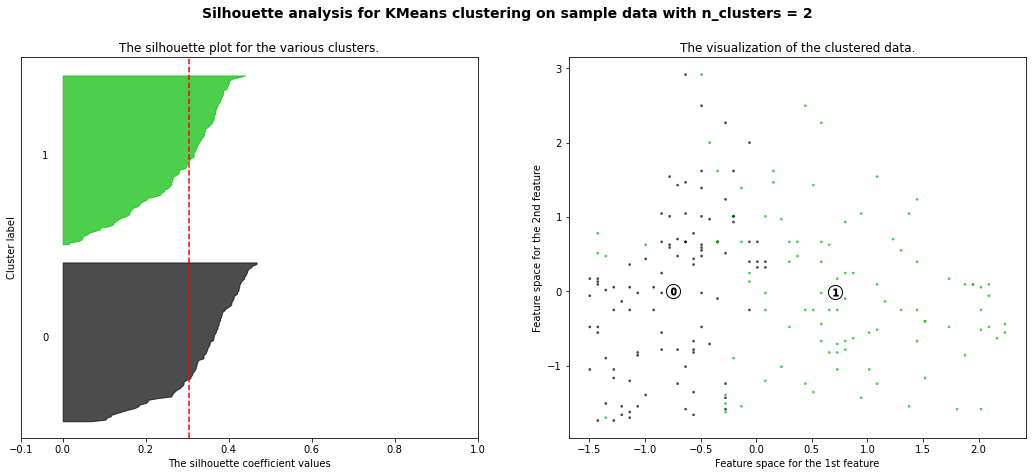

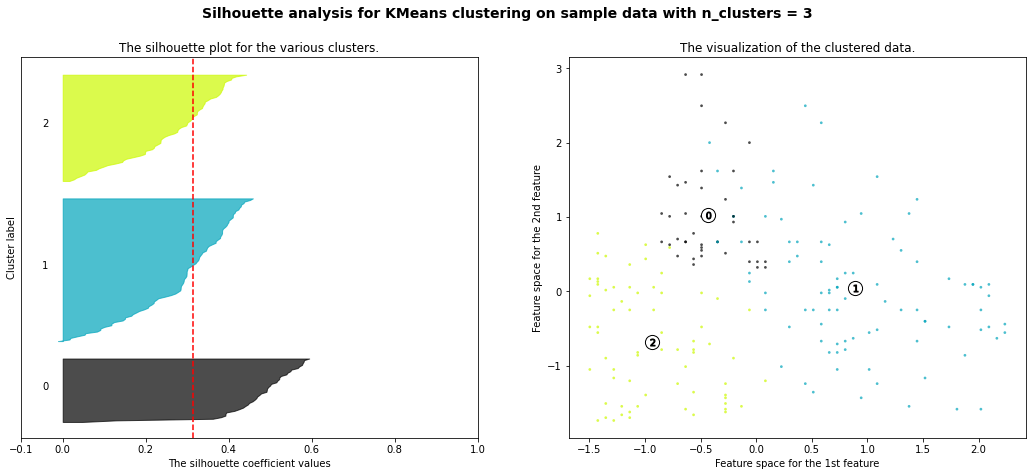

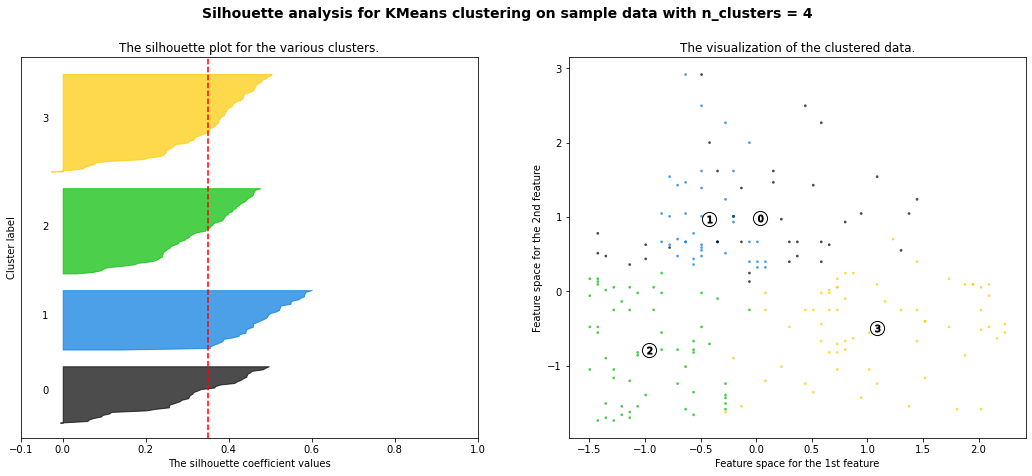

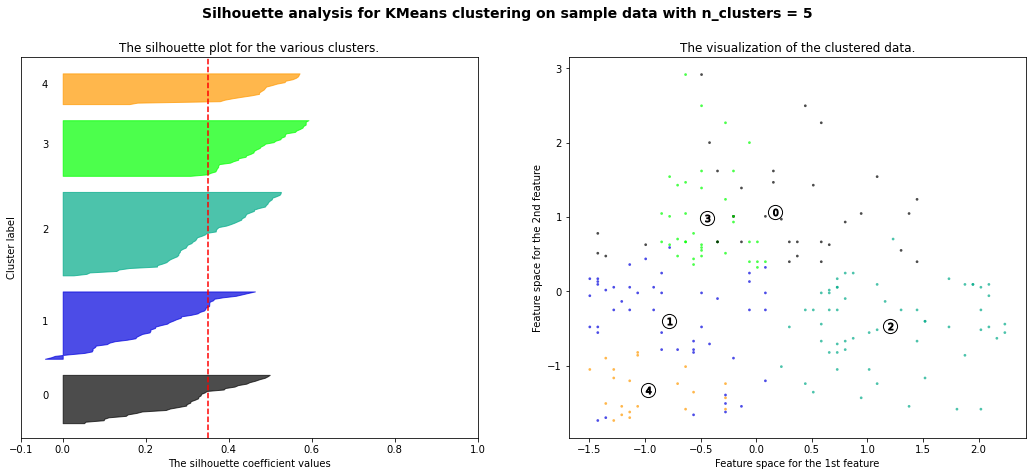

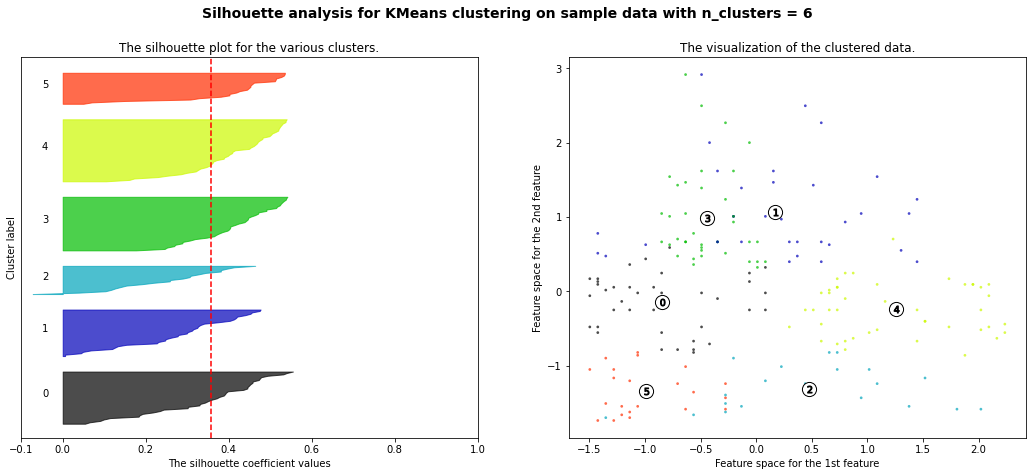

In [65]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

6. Next, we will take $K=5$ clusters. Apply the KMeans to your dataset.

In [66]:
kmeans = KMeans(n_clusters= 5, init = "k-means++", random_state = 0)
clusters = kmeans.fit_predict(df)
df_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
display(df_centroids)
clusters

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,-0.974396,-1.329545,1.132178,0.409091
1,-0.781722,-0.403069,-0.215914,0.340426
2,1.198627,-0.460981,-0.327038,0.431034
3,0.173295,1.066454,-1.298010,0.588235
4,-0.441917,0.991583,1.239503,0.461538


array([1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1,
       2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 4, 1, 4, 3, 4, 3, 4, 3, 4,
       1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

In [67]:
X = df.copy()
X["clusters"] = clusters
X["clusters"] = X["clusters"].map({0:"Careless", 1:"Standard", 2: "Careful", 3:"Target", 4:"Generous"})
df_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)

7. Let's create a graph that will allow us to visualize each of the clusters as well as their centroids. We will first take the ```Spending Score``` as the ordinate and the ```Annual Income``` as the abscissa. 

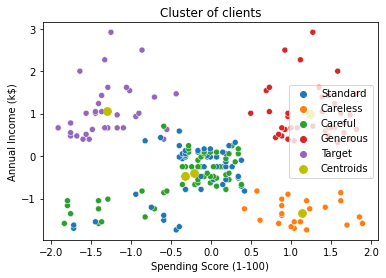

In [68]:
sns.scatterplot(data=X, x="Spending Score (1-100)", y="Annual Income (k$)", hue="clusters")
plt.scatter(x=df_centroids["Spending Score (1-100)"], y=df_centroids["Annual Income (k$)"], color="y", s=60, label="Centroids")
plt.legend(loc="right")
plt.title("Cluster of clients")
plt.show()

8. We have a nice visualization with a nice cluster separation. Look this time at the variable ```Age``` in relation to the ```Spending Score```. What do you notice?

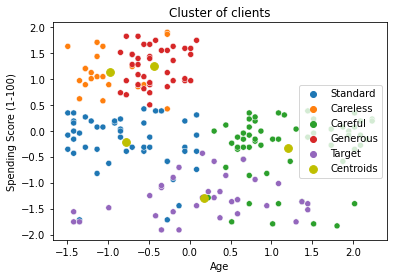

In [69]:
sns.scatterplot(data=X, x="Age", y="Spending Score (1-100)", hue="clusters")
plt.scatter(x=df_centroids["Age"], y=df_centroids["Spending Score (1-100)"], color="y", s=60, label="Centroids")
plt.legend(loc="right")
plt.title("Cluster of clients")
plt.show()